In [1]:
path_seis = "C:/Users/vwt756/OneDrive - GEUS/DATA/seismic_data/"

#\\NETAPP\Petrel\PetrelProjects\UTM33\Employee\PSpro\DATA\Mads\DATA\HRS project\Locreta_proj_Mads_localtest.prj\seismic.dir

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import segysak
from segysak.segy import segy_loader, well_known_byte_locs

C:\Users\vwt756\Anaconda3\lib\site-packages\segysak\segy\_segy_core.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [4]:
raw = segy_loader(path_seis + 'valdemar2016_poststack_raw.sgy', iline=189, xline=193, cdpx=181, cdpy=185, vert_domain="TWT")
valdemar = segy_loader(path_seis + 'valdemar2016_poststack.sgy', iline=189, xline=193, cdpx=181, cdpy=185, vert_domain="TWT")
ai = segy_loader(path_seis + 'inverted2016_Zp.sgy', iline=189, xline=193, cdpx=181, cdpy=185, vert_domain="TWT")
vpvs = segy_loader(path_seis + 'inverted2016_VpVs.sgy', iline=189, xline=193, cdpx=181, cdpy=185, vert_domain="TWT")
#ps = segy_loader(path_seis + 'valdemar2016_BP.sgy',  iline=189, xline=193, cdpx=181, cdpy=185,offset=37)
#ps_pros = segy_loader(path_seis + 'valdemar2016_radon_SG_trimmed1.sgy',  iline=189, xline=193, cdpx=181, cdpy=185,offset=37)

  0%|          | 0.00/106k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is INLINE_3D


Converting SEGY:   0%|          | 0.00/106k [00:00<?, ? traces/s]

  0%|          | 0.00/106k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is INLINE_3D


Converting SEGY:   0%|          | 0.00/106k [00:00<?, ? traces/s]

  0%|          | 0.00/106k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is INLINE_3D


Converting SEGY:   0%|          | 0.00/106k [00:00<?, ? traces/s]

  0%|          | 0.00/106k [00:00<?, ? traces/s]

Loading as 3D
Fast direction is INLINE_3D


Converting SEGY:   0%|          | 0.00/106k [00:00<?, ? traces/s]

In [5]:
np.argwhere(ai.twt.data == 2600)

array([[275]], dtype=int64)

In [6]:
raw.data.data = raw.data.data / np.abs(raw.data.data).max()
valdemar.data.data = valdemar.data.data / np.abs(valdemar.data.data).max()

In [7]:
valdemar.data.data.max()

1.0

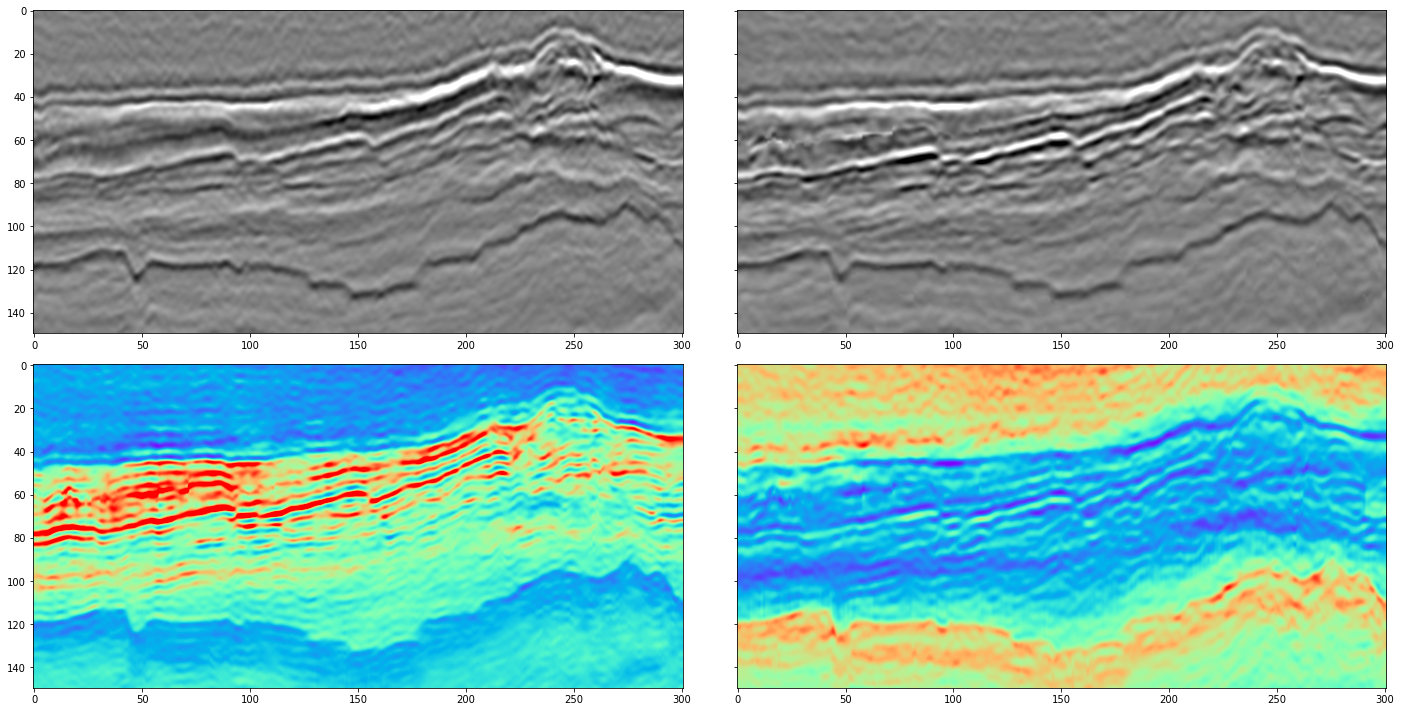

In [13]:
fig, [[ax1, ax2], [ax3,ax4]] = plt.subplots(2, 2, sharey=True, figsize=(20,10))

ax1.imshow(raw.data[:,126,125:275].T, cmap='gray_r', interpolation='spline36', vmin=-.5, vmax=.5)
ax2.imshow(valdemar.data[:,126,125:275].T, cmap='gray_r', interpolation='spline36', vmin=-.5, vmax=.5)
ax3.imshow(ai.data[:,126,125:275].T, cmap='rainbow', interpolation='spline36', vmin=3000, vmax=10000)
ax4.imshow(vpvs.data[:,126,125:275].T, cmap='rainbow', interpolation='spline36')
plt.tight_layout()

In [12]:
ai.data[:,126,125:275].T.min()

<xarray.DataArray 'data' ()>
array(3176.30151367)
Coordinates:
    xline    uint16 7926

In [26]:
valdemar.data[:,126,:].T.shape

(376, 151)

  0%|          | 0.00/2.85M [00:00<?, ? traces/s]

Loading as 3D
Fast direction is INLINE_3D


Converting SEGY:   0%|          | 0.00/2.85M [00:00<?, ? traces/s]

  0%|          | 0.00/2.85M [00:00<?, ? traces/s]

Loading as 3D
Fast direction is INLINE_3D


Converting SEGY:   0%|          | 0.00/2.85M [00:00<?, ? traces/s]

In [14]:
ps.data.data.shape

(301, 351, 376, 27)

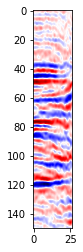

In [19]:
plt.imshow(ps.data.data[0,126,125:275,:], cmap='seismic_r', interpolation='spline36')

In [10]:
ps.data.data = ps.data.data / np.abs(ps.data.data).max()
ps_pros.data.data = ps_pros.data.data / np.abs(ps_pros.data.data).max()

In [11]:
ps.data.data[0,126,125:275,:].max()

0.17689587

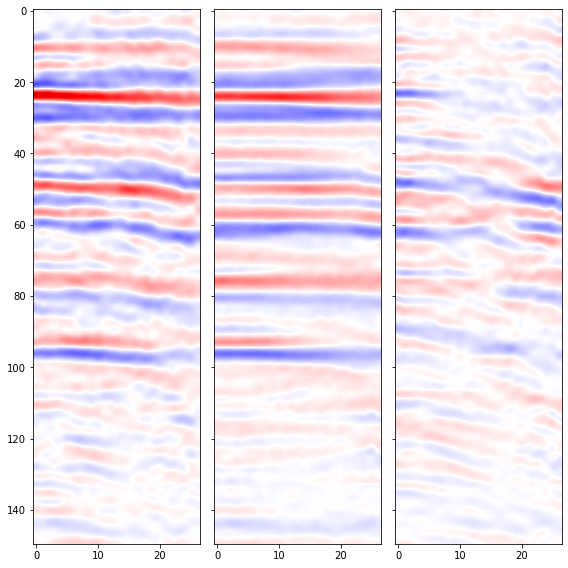

In [12]:
fig, [ax1, ax2, ax3] = plt.subplots(1,3, sharey=True, figsize=(8,8))

ax1.imshow(ps.data.data[250,126,125:275,:], cmap='seismic_r', interpolation='spline36', vmin=-.5, vmax=.5,aspect='auto')

ax2.imshow(ps_pros.data.data[250,126,125:275,:], cmap='seismic_r', interpolation='spline36', vmin=-.5, vmax=.5,aspect='auto')

ax3.imshow(ps_pros.data.data[250,126,125:275,:] - ps.data.data[250,126,125:275,:], cmap='seismic_r', interpolation='spline36', vmin=-.5, vmax=.5,aspect='auto')

plt.tight_layout()


In [16]:
import segyio

NameError: name 'tops_twt' is not defined

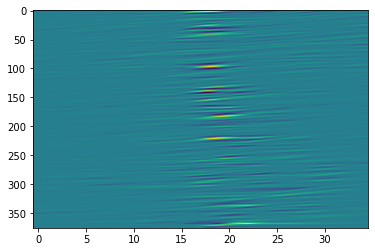

In [23]:
il_bo2 = 8366
xl_bo2 = 7926

#file = 'valdemar2016_5-35deg.sgy'
#trace range : 6077 , 6271
#4704, 4899
#107407 - 106231


with segyio.open(path_seis +'Tau-P_arb_line_7900_8448.sgy', ignore_geometry=True) as f: # iline=189 , xline=189
    arbitrary_line_1 = np.asarray([np.copy(x) for x in f.trace])

time = np.arange(1.5,3.004,0.004)
t_start = 2.16
index_start = (np.abs(time-t_start)).argmin()
t_stop = 2.3
index_stop = (np.abs(time-t_stop)).argmin()

#trace_range = np.array([4725, 4800])
#trace_range = np.array([106650, 106700])

trace_range = np.array([107250, 107285])
arbitrary_line = arbitrary_line_1[trace_range[0]:trace_range[1],:]


#newcmp = matplotlib.colors.LinearSegmentedColormap.from_list("", ['red','white','white','blue'])#["blue","white","white","orange"])

plt.figure()
           
plt.imshow(arbitrary_line.T, aspect='auto', interpolation= 'spline36')
plt.hlines(tops_twt[5]*1000., -.1,.1,color = 'white', lw=6,   alpha=0.8)
plt.hlines(tops_twt[6]*1000., -.1,.1,color = 'white', lw=6,   alpha=0.8)
plt.hlines(tops_twt[7]*1000., -.1,.1,color = 'white', lw=6,   alpha=0.8)
plt.hlines(tops_twt[8]*1000., -.1,.1,color = 'white', lw=6,   alpha=0.8)



plt.hlines(tops_twt[5]*1000., -.1,.1,color = 'magenta', lw=3,   alpha=0.8, label='Base Chalk')
plt.hlines(tops_twt[6]*1000., -.1,.1,color = 'red',     lw=3,   alpha=0.8, label = 'Top Sola')
plt.hlines(tops_twt[7]*1000., -.1,.1,color = 'green',   lw=3,   alpha=0.8, label = 'Top Tuxen')
plt.hlines(tops_twt[8]*1000., -.1,.1,color = 'orange',  lw=3,   alpha=0.8, label = 'Top Valhall')   
plt.clim(-.12,.12)
plt.colorbar()
plt.ylabel('TWT [ms]')
plt.xlabel('Time [s]')
plt.legend()

if savefig == True:
    plt.savefig(fig_path+'taup_bo2x.pdf',format='pdf', bbox_inches='tight')
    print('FIGURE SAVED')

In [31]:
fms_twt = np.array([2356.225 , 2373.938, 2430.517, 2555.356])
fms_ = ['Base Chalk', 'Rødby', 'Tuxen', 'Valhall', 'BCU']


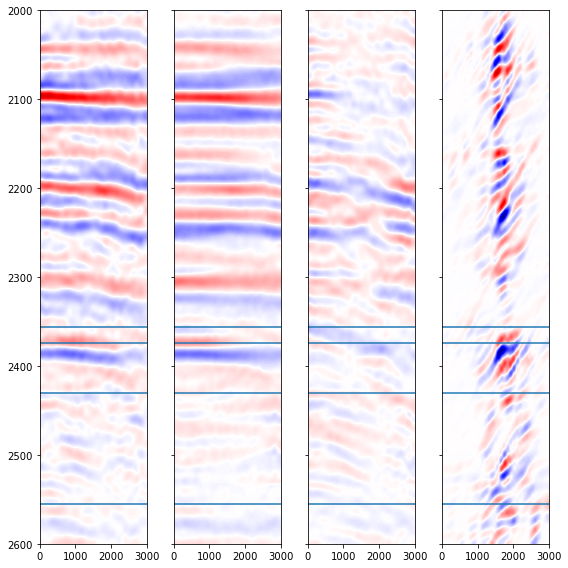

In [38]:
fig, [ax1, ax2, ax3, ax4] = plt.subplots(1,4, sharey=True, figsize=(8,8))

ax1.imshow(ps.data.data[250,126,125:275,:], cmap='seismic_r', interpolation='spline36', vmin=-.5, vmax=.5,aspect='auto', extent = [0,3000,2600,2000])

ax2.imshow(ps_pros.data.data[250,126,125:275,:], cmap='seismic_r', interpolation='spline36', vmin=-.5, vmax=.5,aspect='auto', extent = [0,3000,2600,2000])

ax3.imshow(ps_pros.data.data[250,126,125:275,:] - ps.data.data[250,126,125:275,:], cmap='seismic_r', interpolation='spline36', vmin=-.5, vmax=.5,aspect='auto', extent = [0,3000,2600,2000])

ax4.imshow(arbitrary_line[:,125:275].T, aspect='auto', interpolation= 'spline36', cmap='seismic_r', vmin=-1, vmax=1 , extent = [0,3000,2600,2000])

ax_ = [ax1, ax2, ax3, ax4]

for i in ax_:
    i.hlines(fms_twt,0,3000)

plt.tight_layout()

In [37]:
fms_twt

array([2356.225, 2373.938, 2430.517, 2555.356])